# Setup Tensorflow 2.0

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.0.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.0.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/include/tensorflow/core/protobuf/cluster.pb_text-impl.h
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/include/tensorflow/core/protobuf/cluster.pb_text.h
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/include/tensorflow/core/protobuf/config.pb.h
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/include/tensorflow/core/protobuf/config.pb_text-impl.h
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/include/tensorflow/core/protobuf/config.pb_text.h
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/include/tensorflow/core/protobuf/control_flow.pb.h
    /usr/local/lib/python3.6/dist-packages/tensorflow_co

In [2]:
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Fetch data from kaggle API

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [6]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 47% 9.00M/19.3M [00:00<00:00, 14.3MB/s]
100% 19.3M/19.3M [00:00<00:00, 28.2MB/s]
 82% 75.0M/92.0M [00:02<00:00, 26.7MB/s]
100% 92.0M/92.0M [00:03<00:00, 31.9MB/s]
 94% 73.0M/77.3M [00:02<00:00, 27.1MB/s]
100% 77.3M/77.3M [00:02<00:00, 31.5MB/s]
 84% 81.0M/96.6M [00:03<00:00, 16.6MB/s]
100% 96.6M/96.6M [00:03<00:00, 30.0MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 6.68MB/s]


# Data setup

In [0]:
import pandas as pd
data = pd.read_csv('/content/icml_face_data.csv.zip', compression='zip')

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
import random

In [13]:
data.head(10)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,Training,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,Training,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,Training,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,Training,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,Training,255 254 255 254 254 179 122 107 95 124 149 150...


In [0]:
g1 = data.groupby(["emotion"]).count()

In [71]:
g1

,Usage,pixels
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


In [14]:
data.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [15]:
data.shape

(35887, 3)

In [16]:
data.loc[data[" Usage"] == "Training"].head(5)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [0]:
def string_to_int_array(item):
    return [int(p) for p in item.split()]

In [0]:
def process_dataframe(data):
  X = [string_to_int_array(item) for item in data.iloc[:, 2].values]
  X = np.array(X) / 255.0
  y = np.array(data.iloc[:, 0].values)
  y = y.astype(np.float32, copy=False)
    
  return X, y

In [0]:
def data_augmentation_process(data):
    not_class1 = data.loc[data['emotion'] != 1]
    class1 = data.loc[data['emotion'] == 1]
    class1_aug = class1
    # This is done to handle the class imbalance for emotion 1 which has only ~500 pics
    for i in range(11):
        class1_aug = class1_aug.append(class1)
    complete_training_set = not_class1.append(class1_aug)
    return process_dataframe(complete_training_set)

In [0]:
train_X, train_y = process_dataframe(data.loc[data[' Usage'] == 'Training'])
validate_X, validate_y = process_dataframe(data.loc[data[' Usage'] == 'PublicTest'])
test_X, test_y = process_dataframe(data.loc[data[' Usage'] == 'PrivateTest'])

In [0]:
train_aug_X, train_aug_y = data_augmentation_process(data.loc[data[' Usage'] == 'Training'])
validate_aug_X, validate_aug_y = data_augmentation_process(data.loc[data[' Usage'] == 'PublicTest'])
test_aug_X, test_aug_y = data_augmentation_process(data.loc[data[' Usage'] == 'PrivateTest'])

In [24]:
print(len(train_X),len(validate_X),len(test_X))

28709 3589 3589


In [25]:
print(len(train_aug_X),len(validate_aug_X),len(test_aug_X))

33505 4205 4194


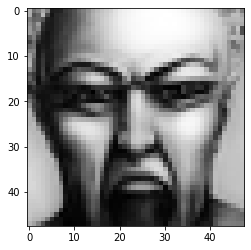

In [26]:
plt.imshow(
    train_X[random.randint(1, train_X.shape[0])].reshape(48, 48),
    cmap='gist_gray')

# Linear Model

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(512,activation=tf.nn.relu),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(train_X,train_y,epochs=10)

Train on 28709 samples
Epoch 1/10
28709/28709 [==============================] - 8s 278us/sample - loss: 1.7860 - accuracy: 0.2701
Epoch 2/10
28709/28709 [==============================] - 8s 263us/sample - loss: 1.6934 - accuracy: 0.3271
Epoch 3/10
28709/28709 [==============================] - 7s 260us/sample - loss: 1.6690 - accuracy: 0.3430
Epoch 4/10
28709/28709 [==============================] - 7s 258us/sample - loss: 1.6503 - accuracy: 0.3532
Epoch 5/10
28709/28709 [==============================] - 7s 257us/sample - loss: 1.6344 - accuracy: 0.3574
Epoch 6/10
28709/28709 [==============================] - 8s 262us/sample - loss: 1.6252 - accuracy: 0.3629
Epoch 7/10
28709/28709 [==============================] - 7s 258us/sample - loss: 1.6157 - accuracy: 0.3668
Epoch 8/10
28709/28709 [==============================] - 7s 256us/sample - loss: 1.6050 - accuracy: 0.3699
Epoch 9/10
28709/28709 [==============================] - 7s 256us/sample - loss: 1.5967 - accuracy: 0.3756
Epoch

In [39]:
model.evaluate(validate_X, validate_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5835811926415784, 0.38088605]

In [40]:
model.evaluate(test_X,test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5961476700921748, 0.378657]

In [0]:
tf.keras.backend.clear_session()

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(512,activation=tf.nn.relu),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(train_aug_X, train_aug_y,epochs = 10)

Train on 33505 samples
Epoch 1/10
33505/33505 [==============================] - 9s 277us/sample - loss: 1.8676 - accuracy: 0.2550
Epoch 2/10
33505/33505 [==============================] - 9s 262us/sample - loss: 1.7635 - accuracy: 0.3200
Epoch 3/10
33505/33505 [==============================] - 9s 260us/sample - loss: 1.6973 - accuracy: 0.3542
Epoch 4/10
33505/33505 [==============================] - 9s 260us/sample - loss: 1.6521 - accuracy: 0.3753
Epoch 5/10
33505/33505 [==============================] - 9s 262us/sample - loss: 1.6114 - accuracy: 0.3922
Epoch 6/10
33505/33505 [==============================] - 9s 265us/sample - loss: 1.5751 - accuracy: 0.4051
Epoch 7/10
33505/33505 [==============================] - 9s 264us/sample - loss: 1.5440 - accuracy: 0.4140
Epoch 8/10
33505/33505 [==============================] - 9s 267us/sample - loss: 1.5215 - accuracy: 0.4206
Epoch 9/10
33505/33505 [==============================] - 9s 272us/sample - loss: 1.5046 - accuracy: 0.4288
Epoch

In [47]:
model.evaluate(validate_aug_X, validate_aug_y)

4205/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.7202158481130703, 0.3762188]

In [48]:
model.evaluate(test_aug_X, test_aug_y)

4194/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.7018077091256607, 0.3750596]

# Convolution Model

In [0]:
modelCNN = keras.Sequential([
                          keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(48,48,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(input_shape=()),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
modelCNN.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_X2d = train_X.reshape(-1,48,48,1,)

In [52]:
train_X.shape

(28709, 2304)

In [53]:
train_X2d.shape

(28709, 48, 48, 1)

In [54]:
modelCNN.fit(train_X2d,train_y,epochs=10)

Train on 28709 samples
Epoch 1/10
28709/28709 [==============================] - 90s 3ms/sample - loss: 1.6028 - accuracy: 0.3715
Epoch 2/10
28709/28709 [==============================] - 90s 3ms/sample - loss: 1.3762 - accuracy: 0.4738
Epoch 3/10
28709/28709 [==============================] - 90s 3ms/sample - loss: 1.2563 - accuracy: 0.5204
Epoch 4/10
28709/28709 [==============================] - 91s 3ms/sample - loss: 1.1479 - accuracy: 0.5686
Epoch 5/10
28709/28709 [==============================] - 92s 3ms/sample - loss: 1.0341 - accuracy: 0.6140
Epoch 6/10
28709/28709 [==============================] - 92s 3ms/sample - loss: 0.9142 - accuracy: 0.6609
Epoch 7/10
28709/28709 [==============================] - 93s 3ms/sample - loss: 0.7830 - accuracy: 0.7155
Epoch 8/10
28709/28709 [==============================] - 93s 3ms/sample - loss: 0.6455 - accuracy: 0.7709
Epoch 9/10
28709/28709 [==============================] - 94s 3ms/sample - loss: 0.5143 - accuracy: 0.8186
Epoch 10/10
28

In [0]:
validate_X2d = validate_X.reshape(-1,48,48,1,)

In [58]:
modelCNN.evaluate(validate_X2d, validate_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8259354681980646, 0.51964337]

In [0]:
test_X2d = test_X.reshape(-1,48,48,1,)

In [56]:
modelCNN.evaluate(test_X2d, test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8072177815085235, 0.5338534]

In [0]:
modelCNN = keras.Sequential([
                          keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(48,48,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(input_shape=()),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
modelCNN.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_aug_X2d = train_aug_X.reshape(-1,48,48,1,)

In [63]:
modelCNN.fit(train_aug_X2d,train_aug_y,epochs=10)

Train on 33505 samples
Epoch 1/10
33505/33505 [==============================] - 110s 3ms/sample - loss: 1.6130 - accuracy: 0.3850
Epoch 2/10
33505/33505 [==============================] - 111s 3ms/sample - loss: 1.2226 - accuracy: 0.5379
Epoch 3/10
33505/33505 [==============================] - 110s 3ms/sample - loss: 1.0372 - accuracy: 0.6079
Epoch 4/10
33505/33505 [==============================] - 107s 3ms/sample - loss: 0.9149 - accuracy: 0.6568
Epoch 5/10
33505/33505 [==============================] - 106s 3ms/sample - loss: 0.7968 - accuracy: 0.7041
Epoch 6/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.6740 - accuracy: 0.7531
Epoch 7/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.5460 - accuracy: 0.8029
Epoch 8/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.4302 - accuracy: 0.8485
Epoch 9/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.3295 - accuracy: 0.8863
Epoch

In [0]:
validate_aug_X2d = validate_aug_X.reshape(-1,48,48,1,)

In [65]:
modelCNN.evaluate(validate_aug_X2d,validate_aug_y)

4205/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.372147736566387, 0.50535077]

In [0]:
test_aug_X2d = test_aug_X.reshape(-1,48,48,1)

In [67]:
modelCNN.evaluate(test_aug_X2d, test_aug_y)

4194/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.1336461307323713, 0.524082]